## **Installing the Packages**
Mpl finance will be used for ploting the Candle stics Chart



In [4]:
!pip install mplfinance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 128 kB 60.0 MB/s 
     |████████████████████████████████| 4.0 MB 55.5 MB/s 
     |████████████████████████████████| 112 kB 60.9 MB/s 
     |████████████████████████████████| 110 kB 43.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
   

## Importing the libraries 

In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime
import mplfinance as mpf #for easy candlesticks ploting 

## Downloading the data from yahoo finance 

VWAP is mostly used for Intraday trading. So downloading the data in a small time frame as (for i.e. 5minutes  and 15minutes)

In [18]:
sun = yf.Ticker("TATAPOWER.NS")
sun_data = sun.history(start='2022-12-19',end = '2022-12-20', interval='1m')
df = pd.DataFrame()
df= sun_data
# df.drop(['Dividends', 'Stock Splits'], axis=1)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-12-19 09:15:00+05:30,217.949997,218.000000,217.000000,217.350006,0,0.0,0.0
2022-12-19 09:16:00+05:30,217.300003,217.550003,217.000000,217.000000,97482,0.0,0.0
2022-12-19 09:17:00+05:30,217.000000,217.050003,216.500000,216.500000,77652,0.0,0.0
2022-12-19 09:18:00+05:30,216.500000,217.100006,216.100006,217.100006,83592,0.0,0.0
2022-12-19 09:19:00+05:30,217.149994,217.300003,216.449997,216.500000,59811,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-19 15:25:00+05:30,216.699997,216.949997,216.699997,216.949997,46233,0.0,0.0
2022-12-19 15:26:00+05:30,216.949997,217.199997,216.949997,217.149994,65915,0.0,0.0
2022-12-19 15:27:00+05:30,217.199997,217.199997,217.149994,217.199997,38545,0.0,0.0


## **Calculation of VWAP**

VWAP = Cumulative Typical Price x Volume/Cumulative Volume

Where Typical Price = High price + Low price + Closing Price/3

Cumulative = total since the trading session opened.


In [19]:
df['Typical_Price'] =((df.Close+df.High+df.Low)/3)
df['VWAP'] = (np.cumsum(df.Volume * df.Typical_Price) / np.cumsum(df.Volume))

## Ploting the Candlestick Chart 


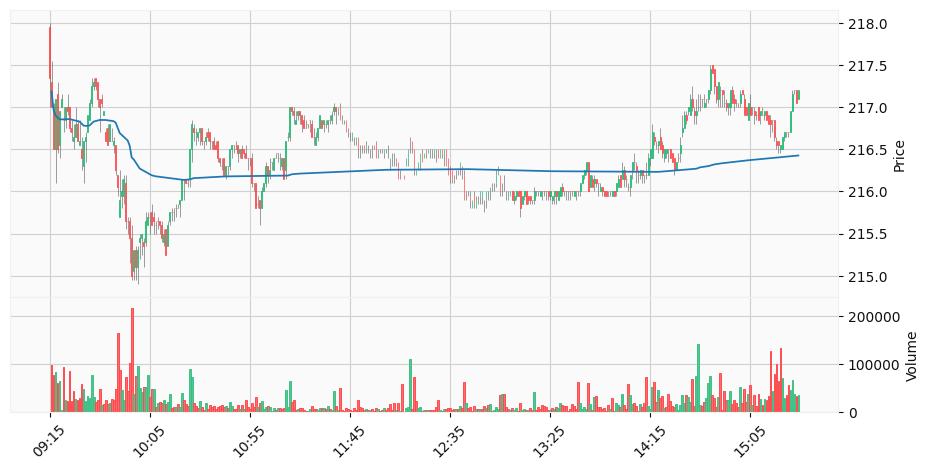

In [20]:
adp = mpf.make_addplot(df['VWAP'], type='line')
mpf.plot(df, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

### Strategy and  Calculation of return 






# 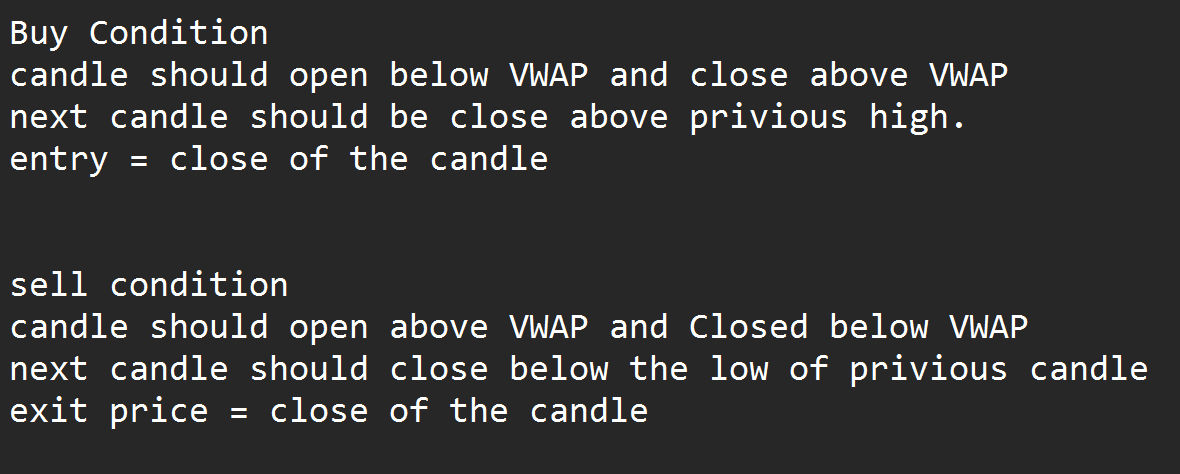

In [21]:
def find_returns_APO(dataset):
 # Create empty lists to store buy and sell signals
  buy = []
  sell = [] 
# Create a flag to track whether a position is currently open
  position = False

  # Appling the buying an selling conditions 
  for i in range(len(dataset)):
    if ((dataset.VWAP[i] >dataset.Open[i] and dataset.VWAP[i] <dataset.Close[i]) and (dataset.Close[i+1] > dataset.High[i])) :

      if position == False:
        buy.append(i+1)

        position = True

    elif ((dataset.Close[i] <dataset.VWAP[i] and dataset.VWAP[i] <dataset.Open[i]) and (dataset.Close[i+1] < dataset.Low[i])):

      if position == True:
        sell.append(i)
        
        position = False
# Concatenate the closing prices at the buy and sell signal indices from dataset1
  merged= pd.concat([dataset.iloc[buy].Close , dataset.iloc[sell].Close] , axis=1)
# Set the column names of the DataFrame to 'Buy' and 'Sell'
  merged.columns = ['Buy', 'Sell']

  totalprofit = merged.shift(-1).Sell-merged.Buy
  
  percent_profits = (merged.shift(-1).Sell-merged.Buy) / merged.Buy
    
  print(merged)
#    uncomment for the number of trades 

  return percent_profits.sum()

In [22]:
find_returns_APO( df )

                                  Buy        Sell
Datetime                                         
2022-12-19 09:21:00+05:30  217.100006         NaN
2022-12-19 12:34:00+05:30         NaN  216.199997
2022-12-19 13:43:00+05:30  216.350006         NaN


-0.004145597097976604

There are less number of trades because of the strict Conditions for buying and selling .
As VWAP mostly used with another indicators and mostly in intraday trading.
it is used for to estimate the actual price considering the volumes traded.
